In [1]:
%matplotlib inline
import pandas as pd

In [4]:
pth = '../data/pdata-group-1.tsv'
p1 = pd.read_csv(pth, sep='\t', index_col=1)

pth = '../data/pdata-group-2.tsv'
p2 = pd.read_csv(pth, sep='\t', index_col=1)

In [9]:
ssx1_samples = p2[p2['fusion transcrit:ch1'] == 'SSX1'].index.values

In [10]:
p1[p1['metastasis:ch1'] == 'no'].shape

(17, 39)

In [11]:
p2[p2['metastasis:ch1'] == 'no'].shape

(30, 39)

In [12]:
with open("group-34-samples.txt", "w") as f:
    f.write("\n".join(p1.index.values))
    
with open("group-58-samples.txt", "w") as f:
    f.write("\n".join(p2.index.values))

In [13]:
!ls ..

data  fit  hydra-out  kitematic  notebooks  survial.R


In [15]:
pth = '../data/SYNOVIAL-ARRAY-GROUP-34.tsv'
df34 = pd.read_csv(pth, sep='\t', index_col=0)

pth = '../data/SYNOVIAL-ARRAY-GROUP-58.tsv'
df58 = pd.read_csv(pth, sep='\t', index_col=0)

In [67]:
import re
regex = re.compile("(?P<proj>\w+)/(?P<stud>\w+)_(?P<pat>\w+)_")
columns = []
for c in df34.columns:
    m = regex.search(c)
    if m:
        columns.append(m.group('pat'))        
df34.columns = columns


columns = []
for c in df58.columns:
    m = regex.search(c)
    if m:
        columns.append(m.group('pat'))        
df58.columns = columns

In [68]:
df34_uq = pd.DataFrame(index=df34.index.unique(), columns=df34.columns)

for sample in df34.columns:
    uq = df34.loc[~df34.index.duplicated(keep=False), sample]
    df34_uq[sample] = uq
    dups = df34.loc[df34.index.duplicated(keep=False), sample].reset_index()
    for gene, values in dups.groupby('index'):
        df34_uq.loc[gene, sample] = max(values.iloc[:, 1].values)
        
        
df58_uq = pd.DataFrame(index=df58.index.unique(), columns=df58.columns)
for sample in df58.columns:
    uq = df58.loc[~df58.index.duplicated(keep=False), sample]
    df58_uq[sample] = uq
    dups = df58.loc[df58.index.duplicated(keep=False), sample].reset_index()
    for gene, values in dups.groupby('index'):
        df58_uq.loc[gene, sample] = max(values.iloc[:, 1].values)

In [76]:
df34_uq.to_csv("synovial-microarray-34-processed.tsv", sep='\t')
df58_uq.to_csv("synovial-microarray-58-processed.tsv", sep='\t')

In [44]:
p2['fusion transcrit:ch1'].unique()

array(['SSX1', 'SSX2'], dtype=object)

In [45]:
rows = ['group', 'age', 'fusion', 'met']

annots = {34: [[] for _ in rows]}
annotations34 = 

for sample in df3.columns:
    
    if sample in p1.index.values:
        group = 1
        age = p1.loc[sample, 'age group:ch1']
        fusion = p1.loc[sample, 'fusion transcrit:ch1']
        met = p1.loc[sample, 'metastasis:ch1']
        
    elif sample in p2.index.values:
        group = 2
        age = p2.loc[sample, 'age group:ch1']
        fusion = p2.loc[sample, 'fusion transcrit:ch1']
        met = p2.loc[sample, 'metastasis:ch1']
        
    else:
        raise ValueError()
        
    

    if group == 1:
        annotations[0].append("red")
    
    elif group == 2:
        annotations[0].append("blue")
        
    if age == 'pediatric':
        annotations[1].append("red")
        
    elif age == 'adult':
        annotations[1].append("blue")
        
    if fusion == 'SSX1':
        annotations[2].append("red")
    
    elif fusion == 'SSX2':
        annotations[2].append("blue")
    
    if met == 'yes':
        annotations[3].append("red")
    
    elif met == 'no':
        annotations[3].append("blue")

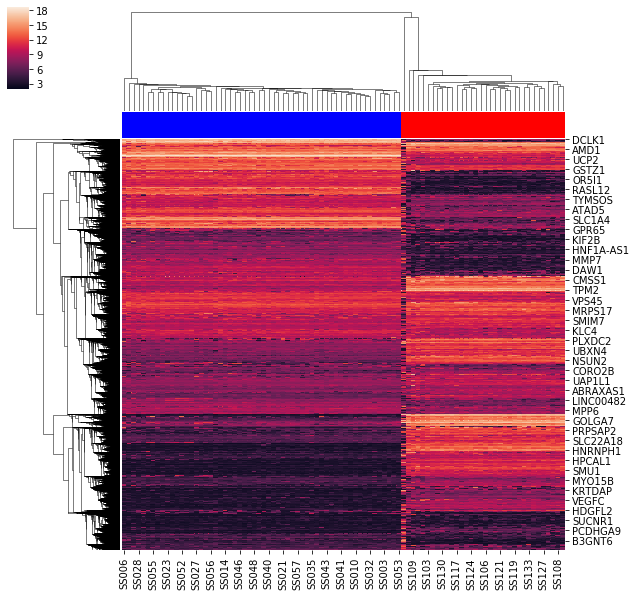

In [47]:
sns.clustermap(df, col_colors=annotations)

In [19]:
df58_uq = pd.read_csv("synovial-microarray-58-processed.tsv", 
                      sep='\t',
                      index_col=0)

In [23]:
df58_uq[ssx1_samples].to_csv('../data/synovial-microarray-58-processed-SSX1.tsv',
                             sep='\t')